# Detecting PII (Personally Identifiable Information)

**Using NLTK Library**

In [1]:
import json

import pandas as pd

from string import punctuation

import nltk, re
import nltk.corpus
from nltk.corpus import brown
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords, state_union
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag.stanford import StanfordNERTagger
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree
from nltk import RegexpParser
from nltk.chunk.api import ChunkParserI

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = 'Set2', )
%matplotlib inline

from sklearn.model_selection import train_test_split

# from faker import Faker

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# with open('D:/DSBA/Year3 Term2/Project/Datasets/conversation.json', 'r') as json_file:
#     f = json_file.read()
# data = json.loads(f)
# data

In [ ]:
# for i in data['conversations']:
#    print(i)

***

In [2]:
sentence = """Hello, you have called Virtual bank, this is Nancy speaking. How may I help you?
Oh, I just had withdrawn some cash from the ATM machine and ATM transaction failed but money got debited. Can you fix this problem?
Sure. What is your account number?
It is 111236669.
Just a moment …. Okay and what is your name ma’am?
My name is Sandra Reed.
Okay, Miss Reed. Can I have your identify number?
Okay. 5589766523663.
Okay. I have 5589766523663.
Correct.
Where is the ATM machine that you had withdraw the cash?
I do not know where exactly it is, but it is in the Pattaya beach.
That is fine, we will check your withdrawal transaction and we will refund the money to your account. Do you want to receive the message when we refunding the money?
Yes, please.
Okay, what is your phone number ma’am?
8779526987.
Okay, I have 8779526987. We will send the message when we refunding the money to your account.
Thanks, Nancy.
Have a good day ma’am. Thank you.
"""

In [3]:
sentence

'Hello, you have called Virtual bank, this is Nancy speaking. How may I help you?\nOh, I just had withdrawn some cash from the ATM machine and ATM transaction failed but money got debited. Can you fix this problem?\nSure. What is your account number?\nIt is 111236669.\nJust a moment …. Okay and what is your name ma’am?\nMy name is Sandra Reed.\nOkay, Miss Reed. Can I have your identify number?\nOkay. 5589766523663.\nOkay. I have 5589766523663.\nCorrect.\nWhere is the ATM machine that you had withdraw the cash?\nI do not know where exactly it is, but it is in the Pattaya beach.\nThat is fine, we will check your withdrawal transaction and we will refund the money to your account. Do you want to receive the message when we refunding the money?\nYes, please.\nOkay, what is your phone number ma’am?\n8779526987.\nOkay, I have 8779526987. We will send the message when we refunding the money to your account.\nThanks, Nancy.\nHave a good day ma’am. Thank you.\n'

In [4]:
type(sentence)

str

***

## Tokenization

    Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is 
    called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

**Sentences tokenization:** the process of splitting up strings into “sentences”

In [6]:
tokenized_sent = sent_tokenize(sentence)

In [7]:
tokenized_sent

['Hello, you have called Virtual bank, this is Nancy speaking.',
 'How may I help you?',
 'Oh, I just had withdrawn some cash from the ATM machine and ATM transaction failed but money got debited.',
 'Can you fix this problem?',
 'Sure.',
 'What is your account number?',
 'It is 111236669.',
 'Just a moment ….',
 'Okay and what is your name ma’am?',
 'My name is Sandra Reed.',
 'Okay, Miss Reed.',
 'Can I have your identify number?',
 'Okay.',
 '5589766523663.',
 'Okay.',
 'I have 5589766523663.',
 'Correct.',
 'Where is the ATM machine that you had withdraw the cash?',
 'I do not know where exactly it is, but it is in the Pattaya beach.',
 'That is fine, we will check your withdrawal transaction and we will refund the money to your account.',
 'Do you want to receive the message when we refunding the money?',
 'Yes, please.',
 'Okay, what is your phone number ma’am?',
 '8779526987.',
 'Okay, I have 8779526987.',
 'We will send the message when we refunding the money to your account.',

**Word Tokenization:** the process of splitting up “sentences” into “words”

In [8]:
tokenized_word = []

for sent in tokenized_sent:
    tokenized_word.append(word_tokenize(sent))
print(tokenized_word)

[['Hello', ',', 'you', 'have', 'called', 'Virtual', 'bank', ',', 'this', 'is', 'Nancy', 'speaking', '.'], ['How', 'may', 'I', 'help', 'you', '?'], ['Oh', ',', 'I', 'just', 'had', 'withdrawn', 'some', 'cash', 'from', 'the', 'ATM', 'machine', 'and', 'ATM', 'transaction', 'failed', 'but', 'money', 'got', 'debited', '.'], ['Can', 'you', 'fix', 'this', 'problem', '?'], ['Sure', '.'], ['What', 'is', 'your', 'account', 'number', '?'], ['It', 'is', '111236669', '.'], ['Just', 'a', 'moment', '…', '.'], ['Okay', 'and', 'what', 'is', 'your', 'name', 'ma', '’', 'am', '?'], ['My', 'name', 'is', 'Sandra', 'Reed', '.'], ['Okay', ',', 'Miss', 'Reed', '.'], ['Can', 'I', 'have', 'your', 'identify', 'number', '?'], ['Okay', '.'], ['5589766523663', '.'], ['Okay', '.'], ['I', 'have', '5589766523663', '.'], ['Correct', '.'], ['Where', 'is', 'the', 'ATM', 'machine', 'that', 'you', 'had', 'withdraw', 'the', 'cash', '?'], ['I', 'do', 'not', 'know', 'where', 'exactly', 'it', 'is', ',', 'but', 'it', 'is', 'in', 

***

## Lowercasing

In [9]:
tokenized_word_lower = []

for sent in tokenized_sent:
    tokenized_word_lower.append([word.lower() for word in word_tokenize(sent)])
print(tokenized_word_lower)

[['hello', ',', 'you', 'have', 'called', 'virtual', 'bank', ',', 'this', 'is', 'nancy', 'speaking', '.'], ['how', 'may', 'i', 'help', 'you', '?'], ['oh', ',', 'i', 'just', 'had', 'withdrawn', 'some', 'cash', 'from', 'the', 'atm', 'machine', 'and', 'atm', 'transaction', 'failed', 'but', 'money', 'got', 'debited', '.'], ['can', 'you', 'fix', 'this', 'problem', '?'], ['sure', '.'], ['what', 'is', 'your', 'account', 'number', '?'], ['it', 'is', '111236669', '.'], ['just', 'a', 'moment', '…', '.'], ['okay', 'and', 'what', 'is', 'your', 'name', 'ma', '’', 'am', '?'], ['my', 'name', 'is', 'sandra', 'reed', '.'], ['okay', ',', 'miss', 'reed', '.'], ['can', 'i', 'have', 'your', 'identify', 'number', '?'], ['okay', '.'], ['5589766523663', '.'], ['okay', '.'], ['i', 'have', '5589766523663', '.'], ['correct', '.'], ['where', 'is', 'the', 'atm', 'machine', 'that', 'you', 'had', 'withdraw', 'the', 'cash', '?'], ['i', 'do', 'not', 'know', 'where', 'exactly', 'it', 'is', ',', 'but', 'it', 'is', 'in', 

## Frequency Distribution

In [10]:
# Distinct words
fdist = FreqDist(word_tokenize(sentence))

In [11]:
print(fdist)

<FreqDist with 98 samples and 217 outcomes>


In [12]:
for i in word_tokenize(sentence):
    fdist[i.lower()]+=1
fdist

FreqDist({'.': 42, ',': 20, 'is': 20, 'the': 18, '?': 16, 'your': 14, 'you': 12, 'have': 9, 'we': 9, 'money': 8, ...})

In [13]:
# checking distinct tokens
len(fdist)

117

In [14]:
fdist.most_common(10)

[('.', 42),
 (',', 20),
 ('is', 20),
 ('the', 18),
 ('?', 16),
 ('your', 14),
 ('you', 12),
 ('have', 9),
 ('we', 9),
 ('money', 8)]

In [15]:
print(fdist.most_common())

[('.', 42), (',', 20), ('is', 20), ('the', 18), ('?', 16), ('your', 14), ('you', 12), ('have', 9), ('we', 9), ('money', 8), ('I', 6), ('and', 6), ('account', 6), ('number', 6), ('Okay', 6), ('ma', 6), ('’', 6), ('am', 6), ('will', 6), ('to', 6), ('i', 6), ('okay', 6), ('what', 5), ('it', 5), ('this', 4), ('had', 4), ('cash', 4), ('machine', 4), ('transaction', 4), ('but', 4), ('a', 4), ('name', 4), ('5589766523663', 4), ('message', 4), ('when', 4), ('refunding', 4), ('8779526987', 4), ('just', 3), ('ATM', 3), ('that', 3), ('do', 3), ('where', 3), ('atm', 3), ('called', 2), ('bank', 2), ('Nancy', 2), ('speaking', 2), ('may', 2), ('help', 2), ('withdrawn', 2), ('some', 2), ('from', 2), ('failed', 2), ('got', 2), ('debited', 2), ('Can', 2), ('fix', 2), ('problem', 2), ('111236669', 2), ('moment', 2), ('…', 2), ('Reed', 2), ('identify', 2), ('withdraw', 2), ('not', 2), ('know', 2), ('exactly', 2), ('in', 2), ('beach', 2), ('fine', 2), ('check', 2), ('withdrawal', 2), ('refund', 2), ('want'

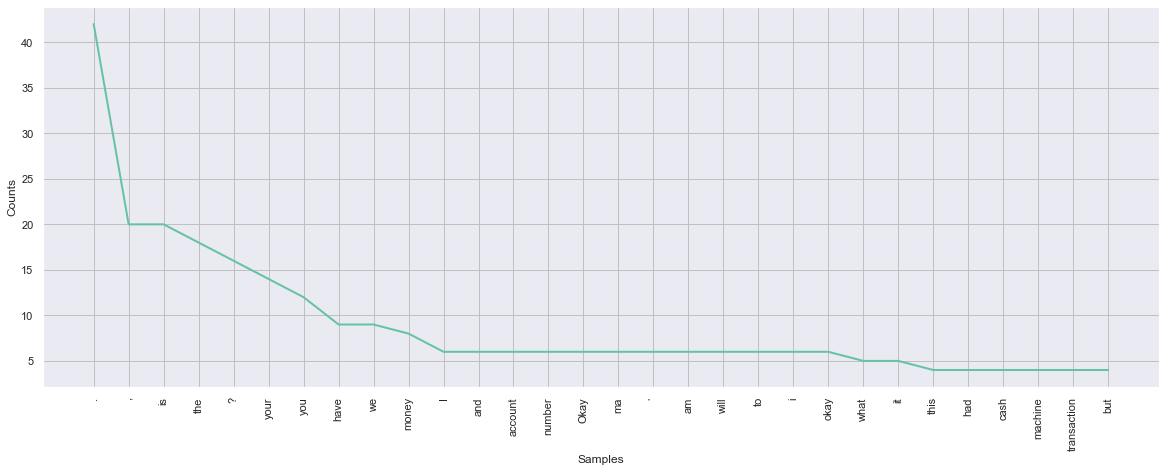

In [16]:
# Frequency Distribution Plot
plt.figure(figsize = (20,7))
fdist.plot(30, cumulative = False)
plt.show()

***

## Stop words and Punctuations

    Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.
    
    In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [19]:
stop_words = set(stopwords.words("english")) # Set checking is faster in Python than list.
print(stop_words)

{'and', 'should', "doesn't", 'had', 'they', 'until', 'over', 'i', 'of', "wouldn't", 'above', 'too', "you'd", 'ma', "hadn't", 'both', 'me', 'out', 'are', 'couldn', 'wasn', "mightn't", 'any', 'in', 'no', 'were', 'shouldn', 'up', 'a', 'once', 'won', 'each', 'between', 'these', "mustn't", 'myself', 'hadn', 'mustn', 'that', 'with', 'more', 'who', 'now', 'or', "don't", 'hers', 'ain', 'you', 'only', 'when', 'y', 'those', "wasn't", 'on', 'under', 'theirs', 'after', 'ours', "it's", 'then', "you've", 'weren', 'herself', 'don', "hasn't", 'the', 'hasn', 'o', 't', 'was', 'can', 'has', 'by', 'other', "aren't", 'below', 'during', 'what', 'his', 'down', 'did', 'this', 'haven', "won't", 'because', 'into', 'not', "weren't", 'against', 'yours', "isn't", 'themselves', 'himself', 'through', 'as', 'there', 'she', 'will', 'their', 'about', 'll', 'itself', 'where', 's', 'being', 'he', 'her', 've', 'm', 'very', 'from', 'we', 'few', 'do', 'having', 'again', "she's", 'be', 'my', 'at', 'for', "couldn't", "shan't"

In [20]:
tokenized_lower = list(map(str.lower, word_tokenize(sentence)))
print(tokenized_lower)

['hello', ',', 'you', 'have', 'called', 'virtual', 'bank', ',', 'this', 'is', 'nancy', 'speaking', '.', 'how', 'may', 'i', 'help', 'you', '?', 'oh', ',', 'i', 'just', 'had', 'withdrawn', 'some', 'cash', 'from', 'the', 'atm', 'machine', 'and', 'atm', 'transaction', 'failed', 'but', 'money', 'got', 'debited', '.', 'can', 'you', 'fix', 'this', 'problem', '?', 'sure', '.', 'what', 'is', 'your', 'account', 'number', '?', 'it', 'is', '111236669', '.', 'just', 'a', 'moment', '…', '.', 'okay', 'and', 'what', 'is', 'your', 'name', 'ma', '’', 'am', '?', 'my', 'name', 'is', 'sandra', 'reed', '.', 'okay', ',', 'miss', 'reed', '.', 'can', 'i', 'have', 'your', 'identify', 'number', '?', 'okay', '.', '5589766523663', '.', 'okay', '.', 'i', 'have', '5589766523663', '.', 'correct', '.', 'where', 'is', 'the', 'atm', 'machine', 'that', 'you', 'had', 'withdraw', 'the', 'cash', '?', 'i', 'do', 'not', 'know', 'where', 'exactly', 'it', 'is', ',', 'but', 'it', 'is', 'in', 'the', 'pattaya', 'beach', '.', 'that

**Puntuations**

In [21]:
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Using a stronger/longer list of stopwords**

    From the previous output, we have still dangly model verbs (i.e. 'could', 'wont', etc.).

    So I will combine the stopwords in NLTK with stopword-json because it has stopwords in 50 languages.

Stopwords from: https://github.com/6/stopwords-json

In [22]:
# Stopwords from stopwords-json
stopwords_json = {"en": ["a","a's","able","about","above","according","accordingly","across","actually","after",
                         "afterwards","again","against","ain't","all","allow","allows","almost","alone","along",
                         "already","also","although","always","am","among","amongst","an","and","another","any",
                         "anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear",
                         "appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated",
                         "at","available","away","awfully","b","be","became","because","become","becomes","becoming",
                         "been","before","beforehand","behind","being","believe","below","beside","besides","best",
                         "better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't",
                         "cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come",
                         "comes","concerning","consequently","consider","considering","contain","containing","contains",
                         "corresponding","could","couldn't","course","currently","d","definitely","described","despite",
                         "did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards",
                         "during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially",
                         "et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly",
                         "example","except","f","far","few","fifth","first","five","followed","following","follows","for",
                         "former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given",
                         "gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly",
                         "has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's",
                         "hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither",
                         "hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate",
                         "in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into",
                         "inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept",
                         "know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let",
                         "let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may",
                         "maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my",
                         "myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never",
                         "nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing",
                         "novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one",
                         "ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out",
                         "outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please",
                         "plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re",
                         "really","reasonably","regarding","regardless","regards","relatively","respectively","right","s",
                         "said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming",
                         "seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she",
                         "should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime",
                         "sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub",
                         "such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx",
                         "that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's",
                         "thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll",
                         "they're","they've","think","third","this","thorough","thoroughly","those","though","three","through",
                         "throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly",
                         "try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up",
                         "upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via",
                         "viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome",
                         "well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's",
                         "whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither",
                         "who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without",
                         "won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your",
                         "yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)

# Combine the stopwords.
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

In [23]:
filtered_sent = []

for w in tokenized_lower:
    if w not in stoplist_combined:
        filtered_sent.append(w)

print("Tokenized Sentence: ")
print(tokenized_lower, '\n')
print("Filterd Sentence: ")
print(filtered_sent)

Tokenized Sentence: 
['hello', ',', 'you', 'have', 'called', 'virtual', 'bank', ',', 'this', 'is', 'nancy', 'speaking', '.', 'how', 'may', 'i', 'help', 'you', '?', 'oh', ',', 'i', 'just', 'had', 'withdrawn', 'some', 'cash', 'from', 'the', 'atm', 'machine', 'and', 'atm', 'transaction', 'failed', 'but', 'money', 'got', 'debited', '.', 'can', 'you', 'fix', 'this', 'problem', '?', 'sure', '.', 'what', 'is', 'your', 'account', 'number', '?', 'it', 'is', '111236669', '.', 'just', 'a', 'moment', '…', '.', 'okay', 'and', 'what', 'is', 'your', 'name', 'ma', '’', 'am', '?', 'my', 'name', 'is', 'sandra', 'reed', '.', 'okay', ',', 'miss', 'reed', '.', 'can', 'i', 'have', 'your', 'identify', 'number', '?', 'okay', '.', '5589766523663', '.', 'okay', '.', 'i', 'have', '5589766523663', '.', 'correct', '.', 'where', 'is', 'the', 'atm', 'machine', 'that', 'you', 'had', 'withdraw', 'the', 'cash', '?', 'i', 'do', 'not', 'know', 'where', 'exactly', 'it', 'is', ',', 'but', 'it', 'is', 'in', 'the', 'pattaya'

***

## Lexicon Normalization

    Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

**Lemmatization:** reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

* Wordnet Lemmatizer (port of the Morphy: https://wordnet.princeton.edu/man/morphy.7WN.html)

By default, the WordNetLemmatizer.lemmatize() function will assume that the word is a Noun if there's no explict POS tag in the input.

First you need the pos_tag function to tag a sentence and using the tag convert it into WordNet tagsets and then put it through to the WordNetLemmatizer.

Note: Lemmatization won't really work on single words alone without context or knowledge of its POS tag (i.e. we need to know whether the word is a noun, verb, adjective, adverb)

In [24]:
wnl = WordNetLemmatizer()

# Create new lemmatization function
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' # if mapping isn't found, fall back to Noun.
    
# `pos_tag` takes the tokenized sentence as input, i.e. list of string,
# and returns a tuple of (word, tg), i.e. list of tuples of strings
# so we need to get the tag from the 2nd element.

In [25]:
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos = penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

In [30]:
# Try lemmatize_sent() and remove stopwords
print('Original Sentence:')
print(tokenized_sent, '\n')
print('Lemmatized and removed stopwords:')
print([word for word in lemmatize_sent(sentence)
       if word not in stoplist_combined])

Original Sentence:
['Hello, you have called Virtual bank, this is Nancy speaking.', 'How may I help you?', 'Oh, I just had withdrawn some cash from the ATM machine and ATM transaction failed but money got debited.', 'Can you fix this problem?', 'Sure.', 'What is your account number?', 'It is 111236669.', 'Just a moment ….', 'Okay and what is your name ma’am?', 'My name is Sandra Reed.', 'Okay, Miss Reed.', 'Can I have your identify number?', 'Okay.', '5589766523663.', 'Okay.', 'I have 5589766523663.', 'Correct.', 'Where is the ATM machine that you had withdraw the cash?', 'I do not know where exactly it is, but it is in the Pattaya beach.', 'That is fine, we will check your withdrawal transaction and we will refund the money to your account.', 'Do you want to receive the message when we refunding the money?', 'Yes, please.', 'Okay, what is your phone number ma’am?', '8779526987.', 'Okay, I have 8779526987.', 'We will send the message when we refunding the money to your account.', 'Than

#### Combining removing stopwords and lemmatization

In [31]:
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined]

***

## POS Tagging

    The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN,
    ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag
    to the word.
    
Checking pos tag lists at https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/

In [32]:
nltk.pos_tag([word for word in lemmatize_sent(sentence) 
            if word not in stoplist_combined])

[('call', 'VB'),
 ('virtual', 'JJ'),
 ('bank', 'NN'),
 ('nancy', 'NN'),
 ('speak', 'JJ'),
 ('withdraw', 'JJ'),
 ('cash', 'NN'),
 ('atm', 'NN'),
 ('machine', 'NN'),
 ('atm', 'JJ'),
 ('transaction', 'NN'),
 ('fail', 'VB'),
 ('money', 'NN'),
 ('debit', 'NN'),
 ('fix', 'NN'),
 ('problem', 'NN'),
 ('account', 'NN'),
 ('number', 'NN'),
 ('111236669', 'CD'),
 ('moment', 'NN'),
 ('…', 'NN'),
 ('’', 'NNP'),
 ('sandra', 'VBD'),
 ('reed', 'VB'),
 ('miss', 'JJ'),
 ('reed', 'NN'),
 ('identify', 'VB'),
 ('number', 'NN'),
 ('5589766523663', 'CD'),
 ('5589766523663', 'CD'),
 ('correct', 'JJ'),
 ('atm', 'NN'),
 ('machine', 'NN'),
 ('withdraw', 'JJ'),
 ('cash', 'NN'),
 ('pattaya', 'NN'),
 ('beach', 'NN'),
 ('fine', 'JJ'),
 ('check', 'NN'),
 ('withdrawal', 'NN'),
 ('transaction', 'NN'),
 ('refund', 'VBD'),
 ('money', 'NN'),
 ('account', 'NN'),
 ('receive', 'JJ'),
 ('message', 'NN'),
 ('refund', 'VBD'),
 ('money', 'NN'),
 ('phone', 'NN'),
 ('number', 'NN'),
 ('’', 'VBD'),
 ('8779526987', 'CD'),
 ('8779526

In [33]:
print(nltk.pos_tag([word for word in lemmatize_sent(sentence) 
            if word not in stoplist_combined]))

[('call', 'VB'), ('virtual', 'JJ'), ('bank', 'NN'), ('nancy', 'NN'), ('speak', 'JJ'), ('withdraw', 'JJ'), ('cash', 'NN'), ('atm', 'NN'), ('machine', 'NN'), ('atm', 'JJ'), ('transaction', 'NN'), ('fail', 'VB'), ('money', 'NN'), ('debit', 'NN'), ('fix', 'NN'), ('problem', 'NN'), ('account', 'NN'), ('number', 'NN'), ('111236669', 'CD'), ('moment', 'NN'), ('…', 'NN'), ('’', 'NNP'), ('sandra', 'VBD'), ('reed', 'VB'), ('miss', 'JJ'), ('reed', 'NN'), ('identify', 'VB'), ('number', 'NN'), ('5589766523663', 'CD'), ('5589766523663', 'CD'), ('correct', 'JJ'), ('atm', 'NN'), ('machine', 'NN'), ('withdraw', 'JJ'), ('cash', 'NN'), ('pattaya', 'NN'), ('beach', 'NN'), ('fine', 'JJ'), ('check', 'NN'), ('withdrawal', 'NN'), ('transaction', 'NN'), ('refund', 'VBD'), ('money', 'NN'), ('account', 'NN'), ('receive', 'JJ'), ('message', 'NN'), ('refund', 'VBD'), ('money', 'NN'), ('phone', 'NN'), ('number', 'NN'), ('’', 'VBD'), ('8779526987', 'CD'), ('8779526987', 'CD'), ('send', 'JJ'), ('message', 'NN'), ('re

***

### NER

In [38]:
def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    prev = None 
    continuous_chunk = []
    current_chunk = []

    for i in chunked:
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

#    if continuous_chunk:
#        named_entity = " ".join(current_chunk)
#        if named_entity not in continuous_chunk:
#            continuous_chunk.append(named_entity)

    return continuous_chunk

print(get_continuous_chunks(sentence))

['Hello', 'Virtual', 'Nancy', 'ATM', 'ATM Okay', 'Sandra Reed', 'Okay', 'Miss Reed', 'Okay Correct', 'ATM Pattaya', 'Okay Okay']


GPE means geo-political entities

In [42]:
for sent in nltk.sent_tokenize(sentence):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            if chunk.label() != 'GPE':
                print(chunk.label(), ' '.join(c[0] for c in chunk))

ORGANIZATION Virtual
PERSON Nancy
ORGANIZATION ATM
ORGANIZATION ATM
PERSON Sandra Reed
PERSON Miss Reed
ORGANIZATION ATM
ORGANIZATION Pattaya
PERSON Nancy


In [40]:
def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document) # sentence segmenter
    sentences = [nltk.word_tokenize(sent) for sent in sentences] # word tokenizer
    sentences = [nltk.pos_tag(sent) for sent in sentences] # part-of-speech tagger
    return sentences

***

In [45]:
# Tokenize the article into sentences: sentences
senttokenized = sent_tokenize(sentence)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in senttokenized]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE':
            print(chunk)

(NE Hello/NNP)
(NE Virtual/NNP)
(NE Nancy/NNP)
(NE ATM/NNP)
(NE ATM/NNP)
(NE Okay/NNP)
(NE Sandra/NNP Reed/NNP)
(NE Okay/NNP)
(NE Miss/NNP Reed/NNP)
(NE Okay/NNP)
(NE Okay/NNP)
(NE Correct/NNP)
(NE ATM/NNP)
(NE Pattaya/NNP)
(NE Okay/NNP)
(NE Okay/NNP)
(NE Nancy/NNP)


In [46]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = False)

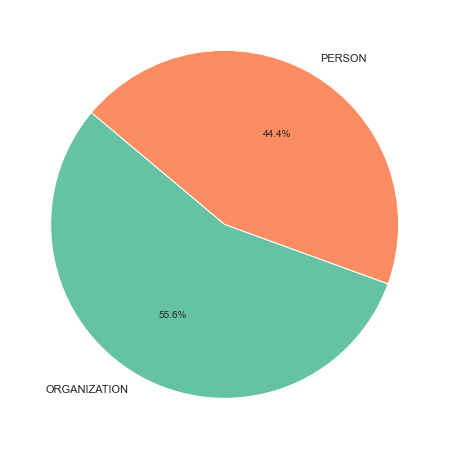

In [47]:
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            if chunk.label() != 'GPE':
                ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140);

***

In [9]:
# Data cleaning
def clean_text(text):
    # replace . and a space with only a space, then make all words lower case.
    text = text.replace(".", " ").replace(",", "").lower()
    # get rid of the . at the end of each line. 
    cleaned_text = re.sub("\.$","", text)
    
    return cleaned_text

In [8]:
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
stoplist_combined = set.union(stopwords_nltk_en, stopwords_punct)

In [14]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [39]:
text = clean_text(sentence)

In [40]:
sent = preprocess(text)
sent

[('hello', 'NN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('called', 'VBN'),
 ('virtual', 'JJ'),
 ('bank', 'NN'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('nancy', 'JJ'),
 ('speaking', 'VBG'),
 ('how', 'WRB'),
 ('may', 'MD'),
 ('i', 'VB'),
 ('help', 'NN'),
 ('you', 'PRP'),
 ('?', '.'),
 ('oh', 'UH'),
 ('i', 'NN'),
 ('just', 'RB'),
 ('had', 'VBD'),
 ('withdrawn', 'VBN'),
 ('some', 'DT'),
 ('cash', 'NN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('atm', 'NN'),
 ('machine', 'NN'),
 ('and', 'CC'),
 ('atm', 'JJ'),
 ('transaction', 'NN'),
 ('failed', 'VBD'),
 ('but', 'CC'),
 ('money', 'NN'),
 ('got', 'VBD'),
 ('debited', 'VBN'),
 ('can', 'MD'),
 ('you', 'PRP'),
 ('fix', 'VB'),
 ('this', 'DT'),
 ('problem', 'NN'),
 ('?', '.'),
 ('sure', 'JJ'),
 ('what', 'WP'),
 ('is', 'VBZ'),
 ('your', 'PRP$'),
 ('account', 'NN'),
 ('number', 'NN'),
 ('?', '.'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('111236669', 'CD'),
 ('just', 'RB'),
 ('a', 'DT'),
 ('moment', 'NN'),
 ('…', 'NN'),
 ('okay', 'NN'),
 ('and', 'CC'),
 ('what', 'WP')

In [41]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [42]:
# Chunking
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP hello/NN)
  you/PRP
  have/VBP
  called/VBN
  (NP virtual/JJ bank/NN)
  this/DT
  is/VBZ
  nancy/JJ
  speaking/VBG
  how/WRB
  may/MD
  i/VB
  (NP help/NN)
  you/PRP
  ?/.
  oh/UH
  (NP i/NN)
  just/RB
  had/VBD
  withdrawn/VBN
  (NP some/DT cash/NN)
  from/IN
  (NP the/DT atm/NN)
  (NP machine/NN)
  and/CC
  (NP atm/JJ transaction/NN)
  failed/VBD
  but/CC
  (NP money/NN)
  got/VBD
  debited/VBN
  can/MD
  you/PRP
  fix/VB
  (NP this/DT problem/NN)
  ?/.
  sure/JJ
  what/WP
  is/VBZ
  your/PRP$
  (NP account/NN)
  (NP number/NN)
  ?/.
  it/PRP
  is/VBZ
  111236669/CD
  just/RB
  (NP a/DT moment/NN)
  (NP …/NN)
  (NP okay/NN)
  and/CC
  what/WP
  is/VBZ
  your/PRP$
  (NP name/NN)
  (NP ma/NN)
  ’/NNP
  am/VBP
  ?/.
  my/PRP$
  (NP name/NN)
  is/VBZ
  (NP sandra/JJ reed/NN)
  (NP okay/NN)
  miss/VBP
  (NP reed/NN)
  can/MD
  i/VB
  have/VB
  your/PRP$
  identify/NNS
  (NP number/NN)
  ?/.
  okay/JJ
  5589766523663/CD
  (NP okay/NN)
  i/NNS
  have/VBP
  5589766523663/CD
  (NP co

In [37]:
cs.draw()

In [43]:
# IOB tags
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('hello', 'NN', 'B-NP'),
 ('you', 'PRP', 'O'),
 ('have', 'VBP', 'O'),
 ('called', 'VBN', 'O'),
 ('virtual', 'JJ', 'B-NP'),
 ('bank', 'NN', 'I-NP'),
 ('this', 'DT', 'O'),
 ('is', 'VBZ', 'O'),
 ('nancy', 'JJ', 'O'),
 ('speaking', 'VBG', 'O'),
 ('how', 'WRB', 'O'),
 ('may', 'MD', 'O'),
 ('i', 'VB', 'O'),
 ('help', 'NN', 'B-NP'),
 ('you', 'PRP', 'O'),
 ('?', '.', 'O'),
 ('oh', 'UH', 'O'),
 ('i', 'NN', 'B-NP'),
 ('just', 'RB', 'O'),
 ('had', 'VBD', 'O'),
 ('withdrawn', 'VBN', 'O'),
 ('some', 'DT', 'B-NP'),
 ('cash', 'NN', 'I-NP'),
 ('from', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('atm', 'NN', 'I-NP'),
 ('machine', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('atm', 'JJ', 'B-NP'),
 ('transaction', 'NN', 'I-NP'),
 ('failed', 'VBD', 'O'),
 ('but', 'CC', 'O'),
 ('money', 'NN', 'B-NP'),
 ('got', 'VBD', 'O'),
 ('debited', 'VBN', 'O'),
 ('can', 'MD', 'O'),
 ('you', 'PRP', 'O'),
 ('fix', 'VB', 'O'),
 ('this', 'DT', 'B-NP'),
 ('problem', 'NN', 'I-NP'),
 ('?', '.', 'O'),
 ('sure', 'JJ', 'O'),
 ('what', 'WP',

In [44]:
ne_tree = ne_chunk(pos_tag(word_tokenize(text)))
print(ne_tree)

(S
  hello/NN
  you/PRP
  have/VBP
  called/VBN
  virtual/JJ
  bank/NN
  this/DT
  is/VBZ
  nancy/JJ
  speaking/VBG
  how/WRB
  may/MD
  i/VB
  help/NN
  you/PRP
  ?/.
  oh/UH
  i/NN
  just/RB
  had/VBD
  withdrawn/VBN
  some/DT
  cash/NN
  from/IN
  the/DT
  atm/NN
  machine/NN
  and/CC
  atm/JJ
  transaction/NN
  failed/VBD
  but/CC
  money/NN
  got/VBD
  debited/VBN
  can/MD
  you/PRP
  fix/VB
  this/DT
  problem/NN
  ?/.
  sure/JJ
  what/WP
  is/VBZ
  your/PRP$
  account/NN
  number/NN
  ?/.
  it/PRP
  is/VBZ
  111236669/CD
  just/RB
  a/DT
  moment/NN
  …/NN
  okay/NN
  and/CC
  what/WP
  is/VBZ
  your/PRP$
  name/NN
  ma/NN
  ’/NNP
  am/VBP
  ?/.
  my/PRP$
  name/NN
  is/VBZ
  sandra/JJ
  reed/NN
  okay/NN
  miss/VBP
  reed/NN
  can/MD
  i/VB
  have/VB
  your/PRP$
  identify/NNS
  number/NN
  ?/.
  okay/JJ
  5589766523663/CD
  okay/NN
  i/NNS
  have/VBP
  5589766523663/CD
  correct/NN
  where/WRB
  is/VBZ
  the/DT
  atm/JJ
  machine/NN
  that/IN
  you/PRP
  had/VBD
  withdraw/VBN